In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
#importing dataset
df=pd.read_csv('C:/Users/procns/Desktop/인공지능/Homework/HW_6/car.data', names = ['buying', 'maint','doors','persons','lug_boot','safety','class'])
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [4]:
from sklearn.preprocessing import LabelEncoder

columns = df.columns

label = LabelEncoder()
for column in columns:
    df[column] = label.fit_transform(df[column])

df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,1,2
1,3,3,0,0,2,2,2
2,3,3,0,0,2,0,2
3,3,3,0,0,1,1,2
4,3,3,0,0,1,2,2


Text(0.5, 1.0, 'Label')

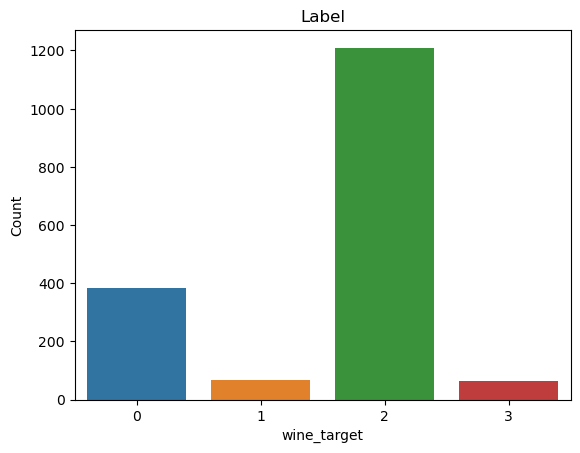

In [5]:
sns.countplot(data = df, x="class")
plt.xlabel("wine_target")
plt.ylabel("Count")
plt.title("Label")

In [6]:
df_data = df.drop(['class'], axis = 1)
df_labels = df['class']

In [7]:
df_data = df_data.to_numpy()
df_labels = pd.get_dummies(df_labels).values

In [8]:
X_train, X_test, y_train, y_test  = train_test_split(df_data, df_labels, test_size = 0.2, stratify= df_labels )

In [9]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

In [10]:
print("X_train.shape :", X_train.shape)

print("y_train.shape :", y_train.shape)

print("X_test.shape:", X_test.shape)

print("y_test.shape:", y_test.shape)

X_train.shape : (1105, 6)
y_train.shape : (1105, 4)
X_test.shape: (346, 6)
y_test.shape: (346, 4)


In [16]:
input_shape = X_train.shape[1]
output_shape = y_train.shape[1]
input_shape, output_shape
batch_size = 32
epochs = 100

In [11]:
# Defining the model 
from keras import Input
from keras.models import Model
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD, Adam
inputs = Input(shape = (6,))

x = Dense(128,activation='relu')(inputs)
x2 = Dense(64,activation='relu')(x)
x3 = Dense(64, activation = 'relu')(x2)
outputs = Dense(4, activation = 'softmax')(x3)

model = Model(inputs = inputs, outputs = outputs)

model.compile('rmsprop',
             loss = "categorical_crossentropy",metrics=["accuracy"]
             )

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6)]               0         
                                                                 
 dense (Dense)               (None, 128)               896       
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 13,572
Trainable params: 13,572
Non-trainable params: 0
_________________________________________________________________


In [12]:
#fitting the model and predicting 
# fit network
history=model.fit(x=X_train, y=y_train, epochs= 100, batch_size=32,validation_data= (X_val,y_val))

Epoch 1/100
35/35 [==============================] - 1s 11ms/step - loss: 0.8470 - accuracy: 0.6715 - val_loss: 0.6793 - val_accuracy: 0.7292
Epoch 2/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6959 - accuracy: 0.7068 - val_loss: 0.6256 - val_accuracy: 0.7473
Epoch 3/100
35/35 [==============================] - 0s 4ms/step - loss: 0.6188 - accuracy: 0.7484 - val_loss: 0.5639 - val_accuracy: 0.7653
Epoch 4/100
35/35 [==============================] - 0s 4ms/step - loss: 0.5553 - accuracy: 0.7747 - val_loss: 0.4965 - val_accuracy: 0.7762
Epoch 5/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4941 - accuracy: 0.7928 - val_loss: 0.4784 - val_accuracy: 0.8231
Epoch 6/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8154 - val_loss: 0.3988 - val_accuracy: 0.8159
Epoch 7/100
35/35 [==============================] - 0s 3ms/step - loss: 0.4040 - accuracy: 0.8262 - val_loss: 0.4206 - val_accuracy: 0.8412
Epoch 8/100


Epoch 59/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0263 - accuracy: 0.9928 - val_loss: 0.2114 - val_accuracy: 0.9278
Epoch 60/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0297 - accuracy: 0.9891 - val_loss: 0.0759 - val_accuracy: 0.9783
Epoch 61/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 0.9910 - val_loss: 0.0560 - val_accuracy: 0.9819
Epoch 62/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0148 - accuracy: 0.9973 - val_loss: 0.1711 - val_accuracy: 0.9386
Epoch 63/100
35/35 [==============================] - 0s 5ms/step - loss: 0.0308 - accuracy: 0.9910 - val_loss: 0.1338 - val_accuracy: 0.9567
Epoch 64/100
35/35 [==============================] - 0s 4ms/step - loss: 0.0226 - accuracy: 0.9955 - val_loss: 0.0832 - val_accuracy: 0.9711
Epoch 65/100
35/35 [==============================] - 0s 3ms/step - loss: 0.0205 - accuracy: 0.9937 - val_loss: 0.0709 - val_accuracy: 0.9819
Epoch 

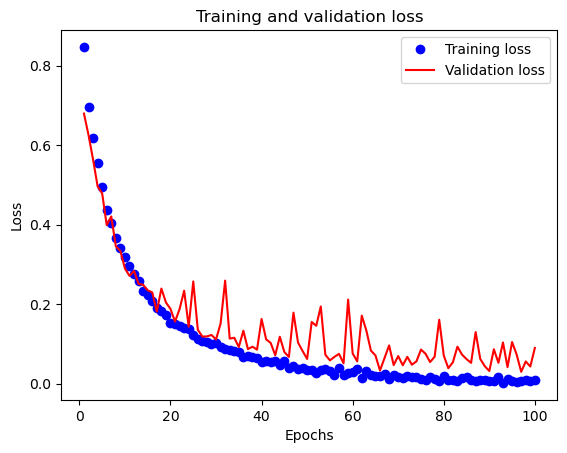

In [13]:
history_dict = history.history
loss = history_dict['loss']
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss'] 
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss') 
plt.plot(epochs, val_loss_values, 'r', label='Validation loss')
plt.title('Training and validation loss') 
plt.xlabel('Epochs')
plt.ylabel('Loss') 
plt.legend()
plt.show()

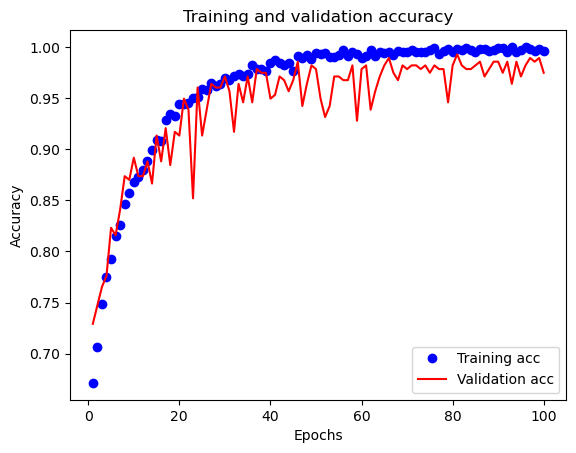

In [14]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [17]:
base_loss,base_accuracy=model.evaluate(X_test,y_test,batch_size = batch_size,verbose=1)

#cnn_file='CNN_Model.h5'
#tf.keras.models.save_model(model, cnn_file, include_optimizer=False)
#print('model saved at ', cnn_file)
#score,keras_file=evaluate_model(trainX,trainy,testX,testy)
score=base_accuracy*100
print('Accuracy >{:f}'.format(score))
print('Base Loss >{:.2f}'.format(base_loss))

11/11 [==============================] - 0s 1ms/step - loss: 0.0799 - accuracy: 0.9769
Accuracy >97.687858
Base Loss >0.08


In [18]:
pred_cnn = model.predict(X_test)
len(pred_cnn)
y_true = np.argmax(y_test, axis = 1)
y_pred = np.argmax(pred_cnn, axis=1)
#y_pred = [0] * len(pred_cnn)
#for i in range(len(pred_cnn)):
#    y_pred[i] = np.argmax(pred_cnn[i])
cm_cnn = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_cnn,cbar=False,annot=True,cmap="Greens",fmt="d")    

11/11 [==============================] - 0s 3ms/step


NameError: name 'confusion_matrix' is not defined